In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\Mustafa Hussain\Desktop\Python_csv\haberman.csv")

In [4]:
df

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [5]:
df.columns = ["Age","Year","Nodes","Survival"]

In [6]:
df.head()

,Age,Year,Nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


 AGENDA: Given a patient with the some Age,Year of Operation and No Lymph 
        nodes detected, we have to predict or conclude the chances whether
        the patient will live less than 5 year or more than 5 years.

In [8]:
df.shape

(305, 4)

In [10]:
df.isnull().sum()

Age         0
Year        0
Nodes       0
Survival    0
dtype: int64

In [14]:
df.duplicated().value_counts()

False    288
True      17
Name: count, dtype: int64

In [16]:
# we will not remove the duplicates,as these can be a genuine possibility


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Age       305 non-null    int64
 1   Year      305 non-null    int64
 2   Nodes     305 non-null    int64
 3   Survival  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [17]:
df.Survival.value_counts()

Survival
1    224
2     81
Name: count, dtype: int64

In [18]:
df = df.replace([1,2],[0,1])


In [19]:
df.Survival.value_counts()

Survival
0    224
1     81
Name: count, dtype: int64

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,305.0,52.531148,10.744024,30.0,44.0,52.0,61.0,83.0
Year,305.0,62.849180,3.254078,58.0,60.0,63.0,66.0,69.0
Nodes,305.0,3.839344,7.283978,0.0,0.0,0.0,4.0,52.0
Survival,305.0,0.265574,0.442364,0.0,0.0,0.0,1.0,1.0


In [21]:
# Minmum Age = 30
#max Age = 83
# Year = [1958-1969], Node =[0,52],Survival=[0,1]5 
# Nodes have Higher count Density between 0 and 4(75% percentile)

# UNIVARITE ANALYSIS

 1.Survival

In [22]:
# 0 --> more than 5 years
# 1 --> less than 5 year 


df.Survival.value_counts()

Survival
0    224
1     81
Name: count, dtype: int64

In [23]:
df.Survival.value_counts(1)

Survival
0    0.734426
1    0.265574
Name: proportion, dtype: float64

There are only 27% people who will be living less than 5 Years, which maeans the datase is imbalanced

<Axes: xlabel='Survival', ylabel='count'>

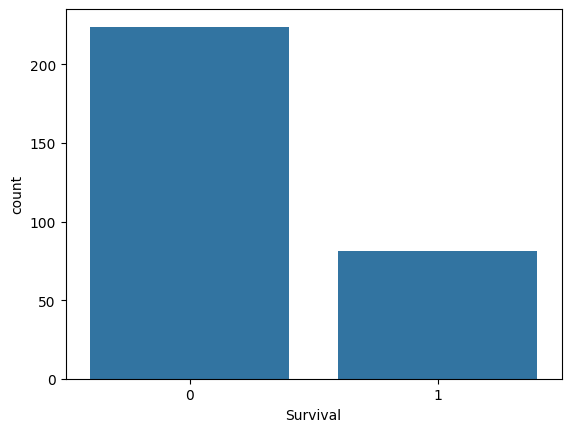

In [25]:
sns.countplot(x="Survival",data=df)

2.Age

In [26]:
df.Age.describe()

count    305.000000
mean      52.531148
std       10.744024
min       30.000000
25%       44.000000
50%       52.000000
75%       61.000000
max       83.000000
Name: Age, dtype: float64

# kde = Kernel Desity Estimation

0.15898611605406873


<Axes: xlabel='Age', ylabel='Count'>

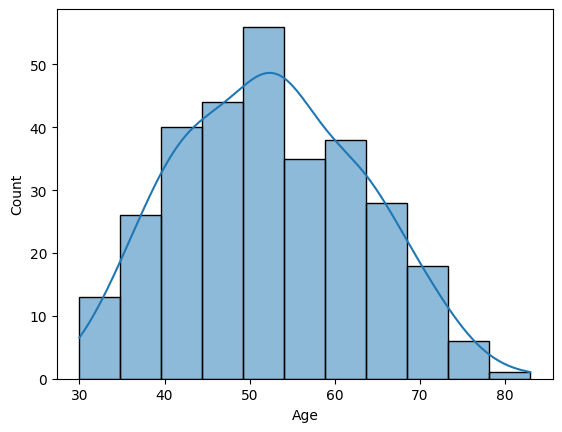

In [32]:
print(df.Age.skew())
sns.histplot(x="Age",data=df,binwidth=5,kde=True)

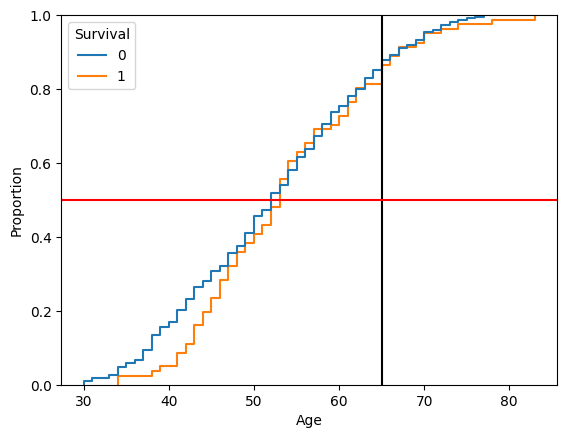

In [38]:
sns.ecdfplot(x="Age",data =df,hue="Survival")
plt.axvline(65,color = "black")
plt.axhline(0.5,color="red")

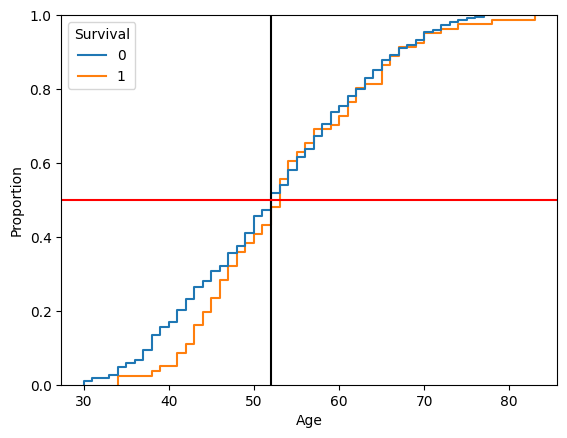

In [40]:
sns.ecdfplot(x="Age",data =df,hue="Survival")
plt.axvline(52,color = "black")
plt.axhline(0.5,color="red")

3. Operation Year

<Axes: xlabel='Year'>

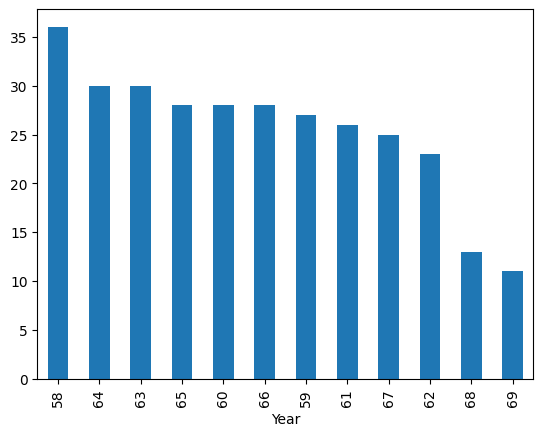

In [46]:
df.Year.value_counts().plot(kind="bar")

4.Lymph Nodes

In [47]:
df.Nodes.describe().transpose()

count    305.000000
mean       3.839344
std        7.283978
min        0.000000
25%        0.000000
50%        0.000000
75%        4.000000
max       52.000000
Name: Nodes, dtype: float64

<Axes: xlabel='Nodes'>

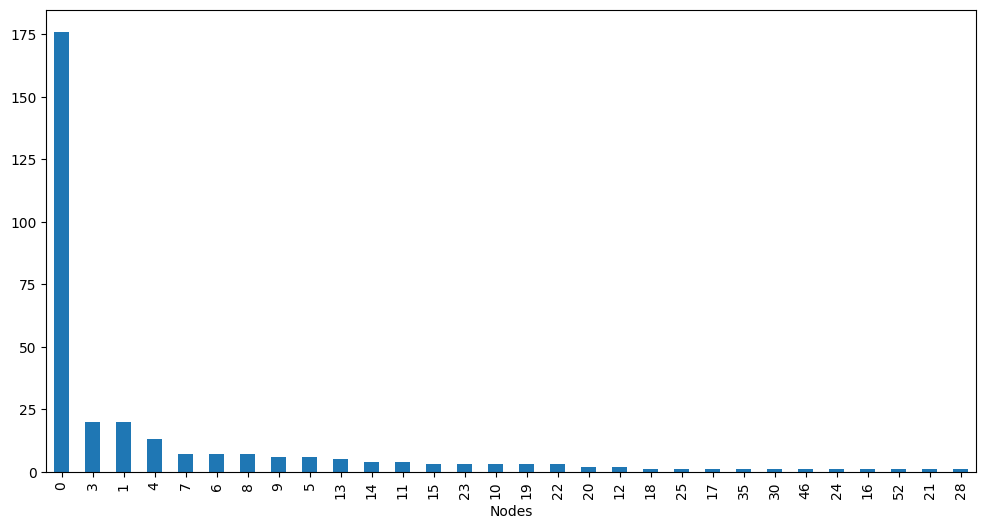

In [49]:
plt.figure(figsize=(12,6))
df.Nodes.value_counts().plot(kind="bar")

<Axes: xlabel='Nodes', ylabel='Count'>

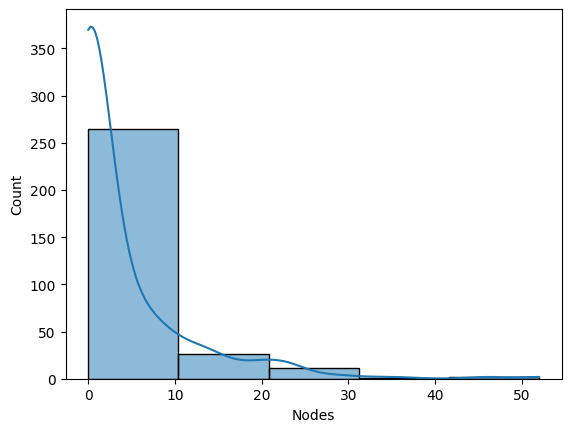

In [55]:
sns.histplot(x="Nodes",data = df,binwidth=10,kde=True)

Maximum Density count for nodes is between 0 to 10.

# BIVARITATE ANALYSIS

<Axes: xlabel='Survival', ylabel='Age'>

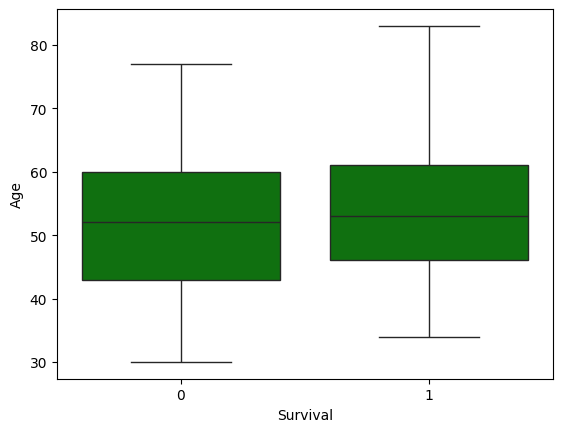

In [60]:
sns.boxplot(x="Survival",y="Age",data = df,color = "green")

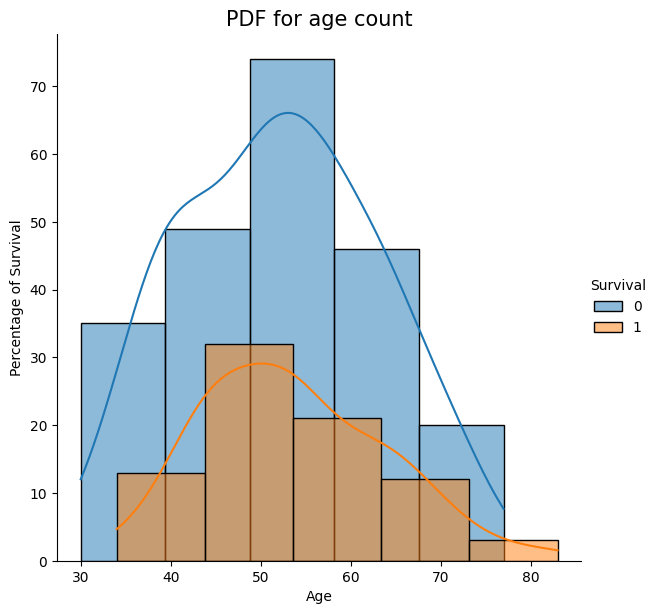

In [64]:
sns.FacetGrid(df,hue="Survival",height=6).map(sns.histplot,"Age",bins=5,kde=True).add_legend()
plt.xlabel("Age")
plt.ylabel("Percentage of Survival")
plt.title("PDF for age count",size=15)
plt.show()

In [67]:
df.groupby("Age")["Survival"].sum().sort_values(ascending=False)

Age
53    6
46    4
43    4
65    4
54    4
52    4
47    3
61    3
45    3
44    3
48    3
41    3
57    3
62    3
50    2
49    2
56    2
51    2
55    2
42    2
66    2
67    2
70    2
34    2
60    2
69    1
72    1
74    1
63    1
78    1
83    1
59    1
39    1
38    1
36    0
33    0
77    0
76    0
75    0
35    0
73    0
71    0
58    0
37    0
68    0
40    0
31    0
64    0
30    0
Name: Survival, dtype: int64

In [69]:
df.Age.value_counts().sort_values(ascending=False)

Age
52    14
54    13
50    12
57    11
53    11
47    11
43    11
65    10
38    10
49    10
41    10
55    10
42     9
45     9
61     9
63     8
59     8
70     7
46     7
48     7
44     7
34     7
62     7
56     7
58     7
37     6
51     6
60     6
39     6
67     6
66     5
64     5
72     4
69     4
40     3
31     2
33     2
35     2
36     2
73     2
68     2
30     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

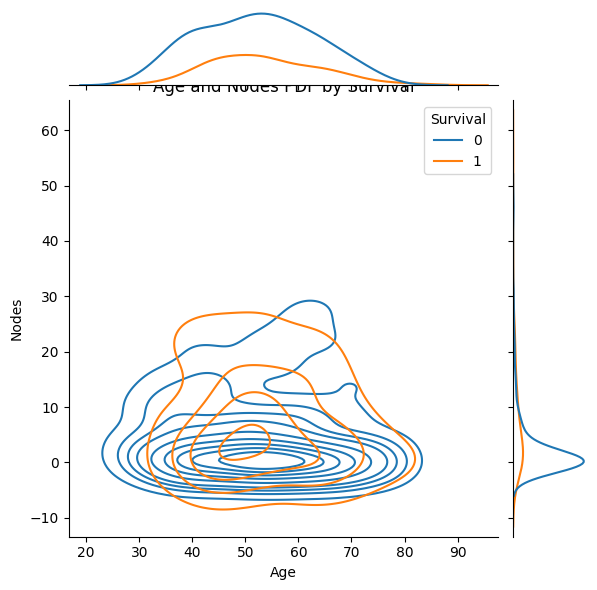

In [71]:
plt.figure(figsize=(12,6))
sns.jointplot(x="Age",y="Nodes",data=df,hue="Survival",kind="kde")
plt.title("Age and Nodes PDF by Survival")
plt.show()

In [72]:
Age[43,53] and Nodes[10-52] will live lesser then 5 years

NameError: name 'Age' is not defined

<Axes: xlabel='Survival', ylabel='Nodes'>

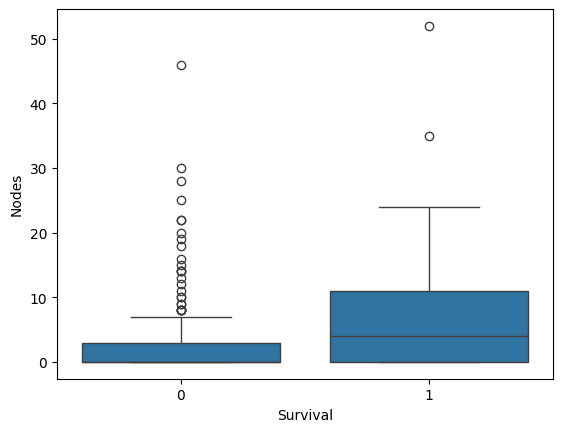

In [73]:
sns.boxplot(data =df,x="Survival",y="Nodes")

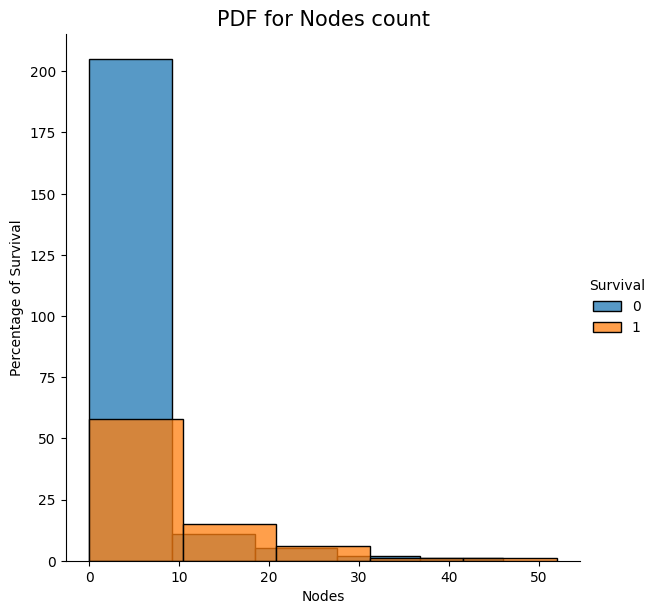

In [76]:
sns.FacetGrid(df,hue="Survival",height=6).map(sns.histplot,"Nodes",bins=5).add_legend()
plt.xlabel("Nodes")
plt.ylabel("Percentage of Survival")
plt.title("PDF for Nodes count",size=15)
plt.show()

In [78]:
df.groupby("Nodes")["Survival"].sum().sort_values(ascending=False)

Nodes
0     27
3      7
1      5
13     4
5      4
9      4
4      3
6      3
23     3
11     3
15     2
19     2
8      2
7      2
24     1
20     1
22     1
21     1
35     1
52     1
17     1
14     1
12     1
10     1
18     0
25     0
28     0
30     0
46     0
16     0
Name: Survival, dtype: int64

In [79]:
df.Nodes.value_counts().sort_values(ascending=False)

Nodes
0     176
1      20
3      20
4      13
7       7
6       7
8       7
9       6
5       6
13      5
14      4
11      4
10      3
22      3
19      3
23      3
15      3
20      2
12      2
18      1
25      1
17      1
35      1
30      1
46      1
24      1
16      1
52      1
21      1
28      1
Name: count, dtype: int64

In [83]:
4/6

0.6666666666666666

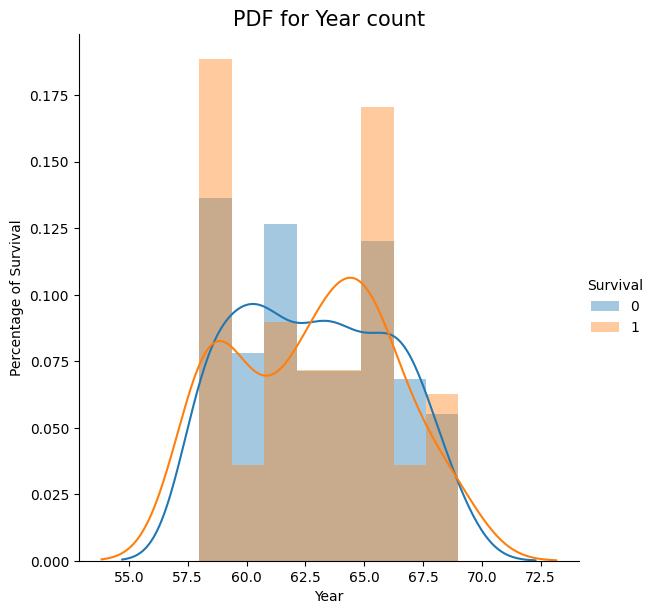

In [92]:
sns.FacetGrid(df,hue="Survival",height=6).map(sns.distplot,"Year",bins=8,kde=True).add_legend()
plt.xlabel("Year")
plt.ylabel("Percentage of Survival")
plt.title("PDF for Year count",size=15)
plt.show()

In [90]:
df.groupby("Survival")["Year"].value_counts().unstack()

Year,58,59,60,61,62,63,64,65,66,67,68,69
Survival,,,,,,,,,,,,
0,24,18,24,23,16,22,22,15,22,21,10,7
1,12,9,4,3,7,8,8,13,6,4,3,4


In [91]:
27/9

3.0

<Figure size 1200x600 with 0 Axes>

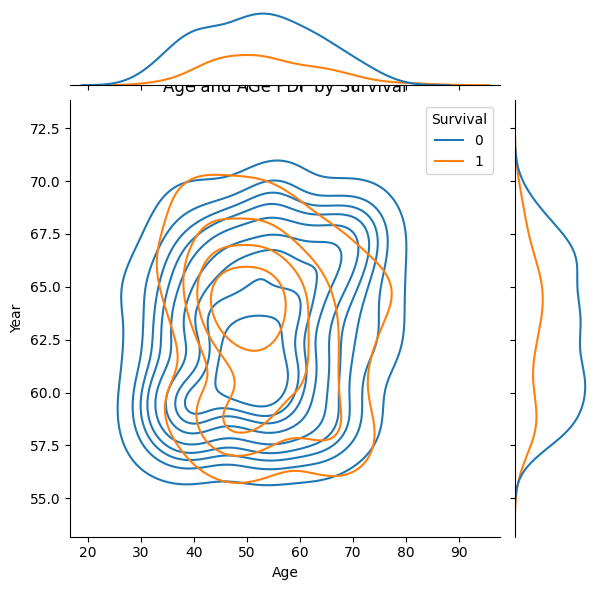

In [93]:
plt.figure(figsize=(12,6))
sns.jointplot(x="Age",y="Year",data=df,hue="Survival",kind="kde")
plt.title("Age and AGe PDF by Survival")
plt.show()

# MULTIVARITAE ANALYSIS

<Axes: >

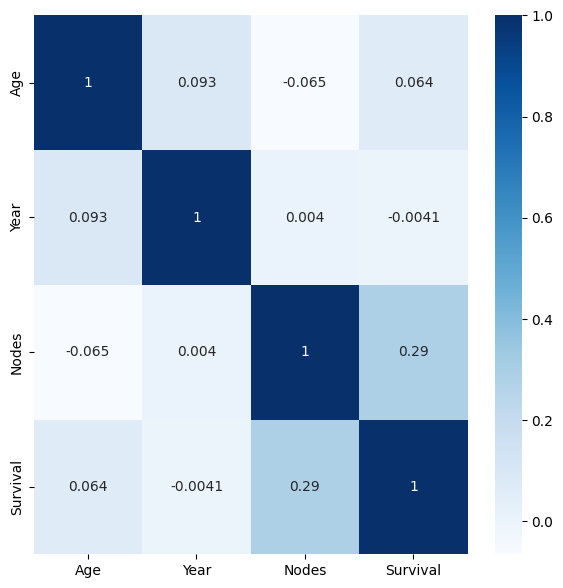

In [99]:
plt.figure(figsize=(7,7))
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap="Blues")


Nodes and Survival are cerelated by 29%